# Neural Networks - intro
## Part 1 - XOR
1. Using the XOR dataset below, train (400 epochs) a neural network (NN) using 2, 3, 4, and 5 hidden layers (where each layer has only 2 neurons). For each n layers, store the resulting accuracy along with n. Plot the results to find what the optimal number of layers is.
2. Repeat the above with 3 neurons in each Hidden layers. How do these results compare to the 2 neuron layers?
3. Repeat the above with 4 neurons in each Hidden layers. How do these results compare to the 2 and 3 neuron layers?
3. Using the most optimal configuraion (n-layers, k-neurons per layer), compare how `tanh`, `sigmoid`,`softplus` and `relu` effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)
4. Again with the most optimal setup, try other optimizers (instead of `SGD`) and report on the loss score. (https://keras.io/optimizers/)


In [1]:
# Import Libraries Etc
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD  #Stochastic Gradient Descent

import numpy as np
# fix random seed for reproducibility
np.random.seed(2023)

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display

In [2]:
# Using Provided XOR Dataset
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

In [3]:
X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

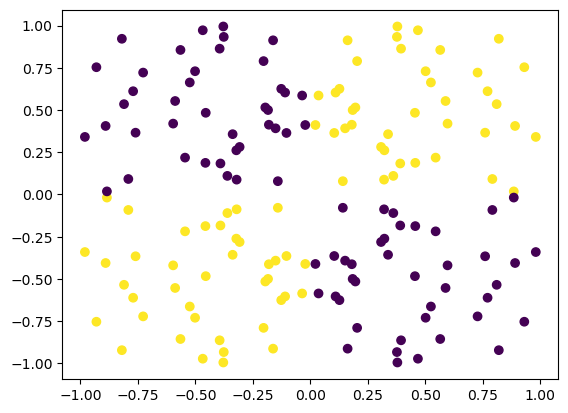

In [4]:
# Visualizing for Own Benefit
plt.scatter(*zip(*X), c=y)

In [5]:
# 1. Using the XOR dataset below, train (400 epochs) a neural network (NN) using 2, 3, 4, and 5 hidden layers 
# (where each layer has only 2 neurons). For each n layers, store the resulting accuracy along with n. Plot the 
# results to find what the optimal number of layers is.

## Two Hidden Layers
model_two_layer = Sequential()
model_two_layer.add(Dense(2, input_dim=2, activation='relu')) # Keeping Dense layers for consistency/simplicity 
model_two_layer.add(Dense(2, activation='relu')) # First argument '2' Keeps two neurons for each layer

## Three Hidden Layers
model_three_layer = Sequential()
model_three_layer.add(Dense(2, input_dim=2, activation='relu')) # Keeping Dense layers for consistency/simplicity 
model_three_layer.add(Dense(2, activation='relu')) 
model_three_layer.add(Dense(2, activation='relu')) 

## Four Hidden Layers
model_four_layer = Sequential()
model_four_layer.add(Dense(2, input_dim=2, activation='relu')) # Keeping Dense layers for consistency/simplicity 
model_four_layer.add(Dense(2, activation='relu')) # Add another layer; three total layers
model_four_layer.add(Dense(2, activation='relu')) 
model_four_layer.add(Dense(2, activation='relu')) 

## Five Hidden Layers
## Four Hidden Layers
model_five_layer = Sequential()
model_five_layer.add(Dense(2, input_dim=2, activation='relu')) # Keeping Dense layers for consistency/simplicity 
model_five_layer.add(Dense(2, activation='relu')) # Add another layer; three total layers
model_five_layer.add(Dense(2, activation='relu')) 
model_five_layer.add(Dense(2, activation='relu')) 
model_five_layer.add(Dense(2, activation='relu')) 

In [6]:
sgd = SGD(lr=0.1)
model_two_layer.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_three_layer.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_four_layer.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_five_layer.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
%%capture
# The training cells result in the html/pdf downloads becoming very long (>400 pages), so I am suppressing output for manageability
# 400 Epoch Training
model_two_layer.fit(X, y, batch_size=12, epochs=400)
model_three_layer.fit(X, y, batch_size=12, epochs=400)
model_four_layer.fit(X, y, batch_size=12, epochs=400)
model_five_layer.fit(X, y, batch_size=12, epochs=400)

In [66]:
# Accuracy & n 
scores_two_layer = model_two_layer.evaluate(X, y)
scores_three_layer = model_three_layer.evaluate(X, y)
scores_four_layer = model_four_layer.evaluate(X, y)
scores_five_layer = model_five_layer.evaluate(X, y)

# Comparison
(scores_two_layer, scores_three_layer, scores_four_layer, scores_five_layer)

5/5 [==============================] - 0s 2ms/step - loss: 4.0526 - accuracy: 0.5000


([4.1732258796691895, 0.518750011920929],
 [3.8243298530578613, 0.5],
 [3.9812514781951904, 0.800000011920929],
 [4.0525898933410645, 0.5])

5/5 [==============================] - 0s 1ms/step


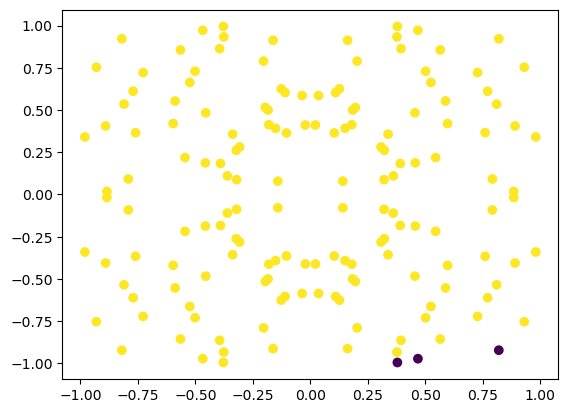

In [67]:
plt.scatter(*zip(*X), c=model_two_layer.predict(X).argmax(axis=-1))

5/5 [==============================] - 0s 998us/step


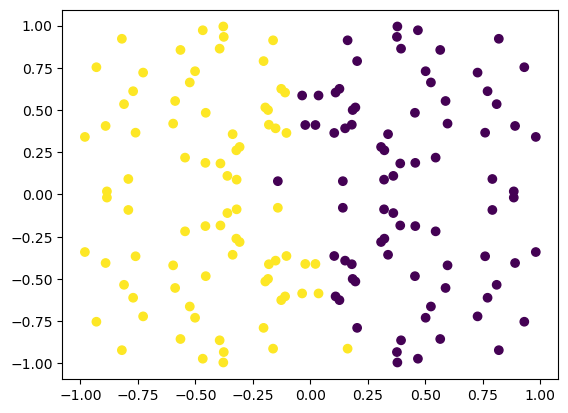

In [68]:
plt.scatter(*zip(*X), c=model_three_layer.predict(X).argmax(axis=-1))

5/5 [==============================] - 0s 2ms/step


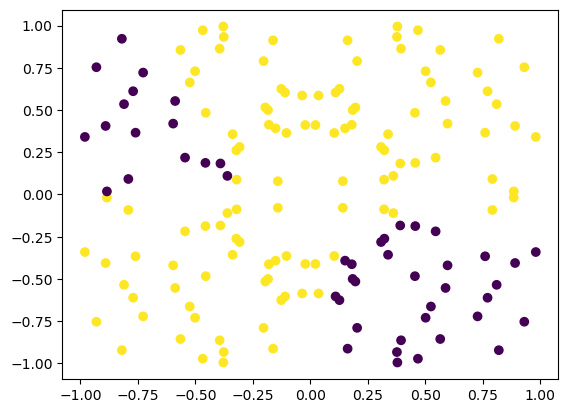

In [69]:
plt.scatter(*zip(*X), c=model_four_layer.predict(X).argmax(axis=-1))

5/5 [==============================] - 0s 1ms/step


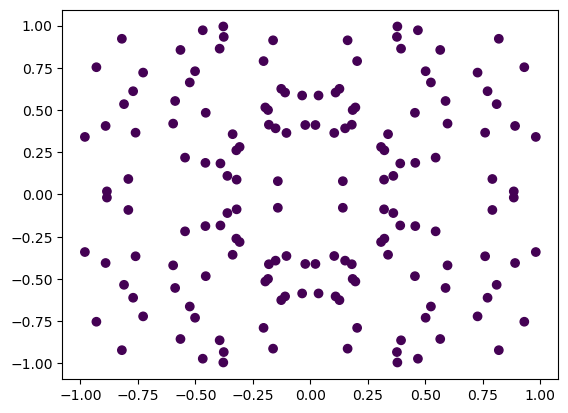

In [70]:
plt.scatter(*zip(*X), c=model_five_layer.predict(X).argmax(axis=-1))

In [13]:
# In the two-neuron setup, the three four-layer model works best, with an accuracy of slightly over .8, and a plot most closely
# predicting the dataset.

In [14]:
# 3. Repeat the above with 3 neurons in each Hidden layers. How do these results compare to the 2 neuron layers?
neurons = 3
neurons

3

In [15]:
# 1. Using the XOR dataset below, train (400 epochs) a neural network (NN) using 2, 3, 4, and 5 hidden layers 
# (where each layer has only 2 neurons). For each n layers, store the resulting accuracy along with n. Plot the 
# results to find what the optimal number of layers is.

## Two Hidden Layers
model_two_layer_3n = Sequential()
model_two_layer_3n.add(Dense(neurons, input_dim=2, activation='relu')) # Keeping Dense layers for consistency/simplicity 
model_two_layer_3n.add(Dense(neurons, activation='relu')) # First argument '2' Keeps two neurons for each layer

## Three Hidden Layers
model_three_layer_3n = Sequential()
model_three_layer_3n.add(Dense(neurons, input_dim=2, activation='relu')) # Keeping Dense layers for consistency/simplicity 
model_three_layer_3n.add(Dense(neurons, activation='relu')) 
model_three_layer_3n.add(Dense(neurons, activation='relu')) 

## Four Hidden Layers
model_four_layer_3n = Sequential()
model_four_layer_3n.add(Dense(neurons, input_dim=2, activation='relu')) # Keeping Dense layers for consistency/simplicity 
model_four_layer_3n.add(Dense(neurons, activation='relu')) # Add another layer; three total layers
model_four_layer_3n.add(Dense(neurons, activation='relu')) 
model_four_layer_3n.add(Dense(neurons, activation='relu')) 

## Five Hidden Layers
## Four Hidden Layers
model_five_layer_3n = Sequential()
model_five_layer_3n.add(Dense(neurons, input_dim=2, activation='relu')) # Keeping Dense layers for consistency/simplicity 
model_five_layer_3n.add(Dense(neurons, activation='relu')) # Add another layer; three total layers
model_five_layer_3n.add(Dense(neurons, activation='relu')) 
model_five_layer_3n.add(Dense(neurons, activation='relu')) 
model_five_layer_3n.add(Dense(neurons, activation='relu')) 

In [16]:
sgd = SGD(lr=0.1)
model_two_layer_3n.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_three_layer_3n.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_four_layer_3n.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_five_layer_3n.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
%%capture
# 400 Epoch Training
model_two_layer_3n.fit(X, y, batch_size=12, epochs=400) 
model_three_layer_3n.fit(X, y, batch_size=12, epochs=400) 
model_four_layer_3n.fit(X, y, batch_size=12, epochs=400) 
model_five_layer_3n.fit(X, y, batch_size=12, epochs=400) 

In [71]:
# Accuracy & n 
scores_two_layer_3n = model_two_layer_3n.evaluate(X, y)
scores_three_layer_3n = model_three_layer_3n.evaluate(X, y)
scores_four_layer_3n = model_four_layer_3n.evaluate(X, y)
scores_five_layer_3n = model_four_layer_3n.evaluate(X, y)

# Comparison
(scores_two_layer_3n, 
 scores_three_layer_3n, 
 scores_four_layer_3n, 
 scores_five_layer_3n)

5/5 [==============================] - 0s 1ms/step - loss: 0.0626 - accuracy: 0.4625


([2.851390838623047, 0.16875000298023224],
 [4.156896114349365, 0.5],
 [0.0625719279050827, 0.4625000059604645],
 [0.0625719279050827, 0.4625000059604645])

5/5 [==============================] - 0s 997us/step


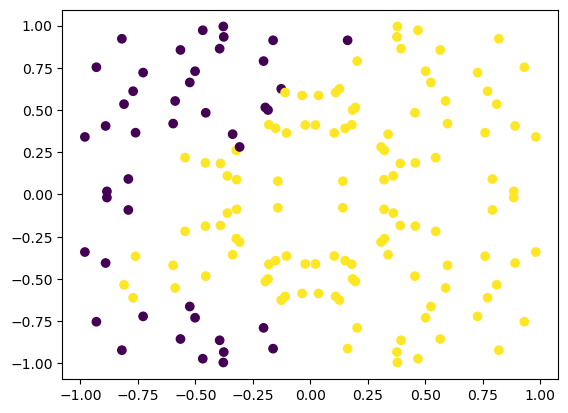

In [72]:
plt.scatter(*zip(*X), c=model_two_layer_3n.predict(X).argmax(axis=-1))

5/5 [==============================] - 0s 2ms/step


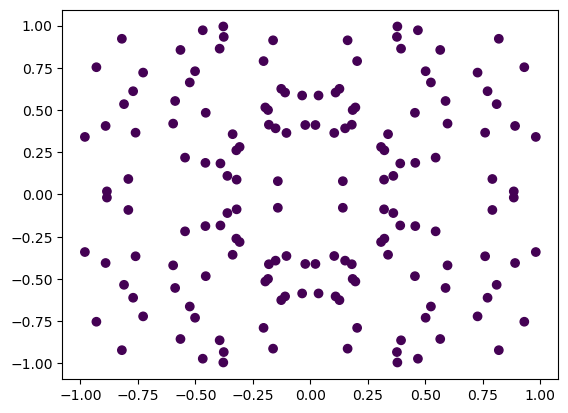

In [73]:
plt.scatter(*zip(*X), c=model_three_layer_3n.predict(X).argmax(axis=-1))

5/5 [==============================] - 0s 1ms/step


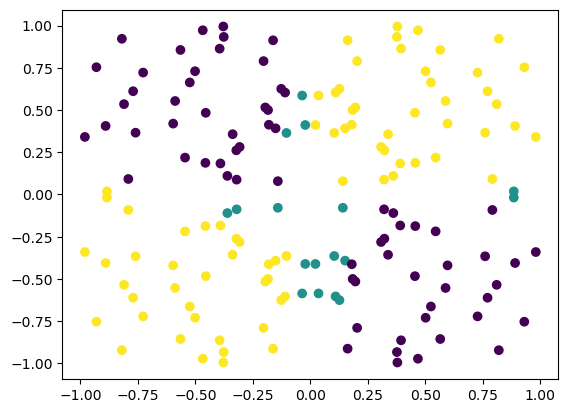

In [74]:
plt.scatter(*zip(*X), c=model_four_layer_3n.predict(X).argmax(axis=-1))

5/5 [==============================] - 0s 1ms/step


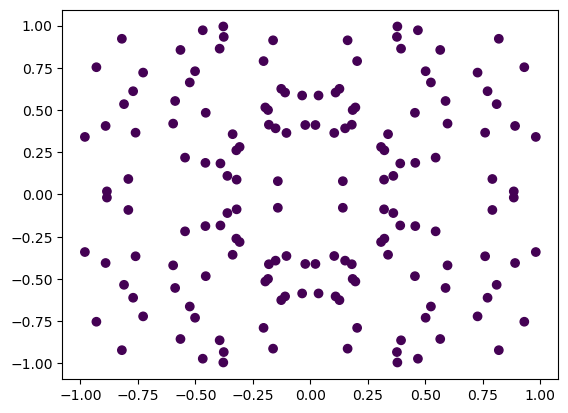

In [76]:
plt.scatter(*zip(*X), c=model_five_layer_3n.predict(X).argmax(axis=-1))

In [23]:
# None off the models in the three-neuron setup performs as well as the two-neuron, four-layer setup; the best options amongst 
# these are the three neuron, four layer setup. 

In [24]:
# 2. Repeat the above with 4 neurons in each Hidden layers. How do these results compare to the 2 and 3 neuron layers?
neurons = 4
neurons

4

In [25]:
# 1. Using the XOR dataset below, train (400 epochs) a neural network (NN) using 2, 3, 4, and 5 hidden layers 
# (where each layer has only 2 neurons). For each n layers, store the resulting accuracy along with n. Plot the 
# results to find what the optimal number of layers is.

## Two Hidden Layers
model_two_layer_4n = Sequential()
model_two_layer_4n.add(Dense(neurons, input_dim=2, activation='relu')) # Keeping Dense layers for consistency/simplicity 
model_two_layer_4n.add(Dense(neurons, activation='relu')) # First argument '2' Keeps two neurons for each layer

## Three Hidden Layers
model_three_layer_4n = Sequential()
model_three_layer_4n.add(Dense(neurons, input_dim=2, activation='relu')) # Keeping Dense layers for consistency/simplicity 
model_three_layer_4n.add(Dense(neurons, activation='relu')) 
model_three_layer_4n.add(Dense(neurons, activation='relu')) 

## Four Hidden Layers
model_four_layer_4n = Sequential()
model_four_layer_4n.add(Dense(neurons, input_dim=2, activation='relu')) # Keeping Dense layers for consistency/simplicity 
model_four_layer_4n.add(Dense(neurons, activation='relu')) # Add another layer; three total layers
model_four_layer_4n.add(Dense(neurons, activation='relu')) 
model_four_layer_4n.add(Dense(neurons, activation='relu')) 

## Five Hidden Layers
## Four Hidden Layers
model_five_layer_4n = Sequential()
model_five_layer_4n.add(Dense(neurons, input_dim=2, activation='relu')) # Keeping Dense layers for consistency/simplicity 
model_five_layer_4n.add(Dense(neurons, activation='relu')) # Add another layer; three total layers
model_five_layer_4n.add(Dense(neurons, activation='relu')) 
model_five_layer_4n.add(Dense(neurons, activation='relu')) 
model_five_layer_4n.add(Dense(neurons, activation='relu')) 

In [26]:
sgd = SGD(lr=0.1)
model_two_layer_4n.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_three_layer_4n.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_four_layer_4n.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_five_layer_4n.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
%%capture
# 400 Epoch Training
model_two_layer_4n.fit(X, y, batch_size=12, epochs=400) 
model_three_layer_4n.fit(X, y, batch_size=12, epochs=400) 
model_four_layer_4n.fit(X, y, batch_size=12, epochs=400) 
model_five_layer_4n.fit(X, y, batch_size=12, epochs=400) 

In [77]:
# Accuracy & n 
scores_two_layer_4n = model_two_layer_4n.evaluate(X, y)
scores_three_layer_4n = model_three_layer_4n.evaluate(X, y)
scores_four_layer_4n = model_four_layer_4n.evaluate(X, y)
scores_five_layer_4n = model_five_layer_4n.evaluate(X, y)

# Comparison
(scores_two_layer_4n, scores_three_layer_4n, scores_four_layer_4n, scores_five_layer_4n)

5/5 [==============================] - 0s 1ms/step - loss: 1.9381 - accuracy: 0.4750


([0.6874362230300903, 0.28125],
 [5.800013542175293, 0.9125000238418579],
 [0.007748936302959919, 0.4937500059604645],
 [1.938126564025879, 0.4749999940395355])

5/5 [==============================] - 0s 998us/step


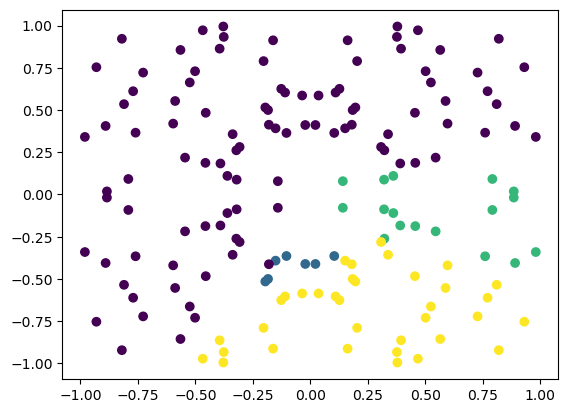

In [78]:
plt.scatter(*zip(*X), c=model_two_layer_4n.predict(X).argmax(axis=-1))

5/5 [==============================] - 0s 998us/step


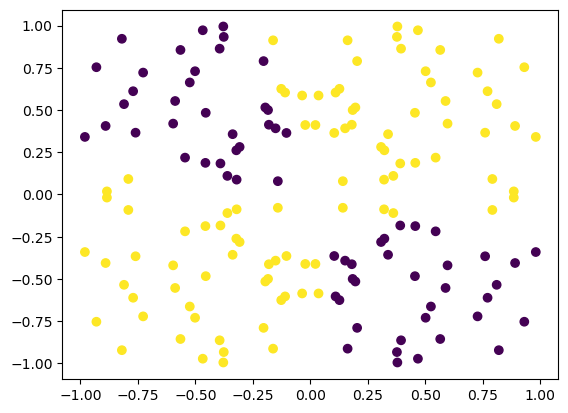

In [79]:
plt.scatter(*zip(*X), c=model_three_layer_4n.predict(X).argmax(axis=-1))

5/5 [==============================] - 0s 1ms/step


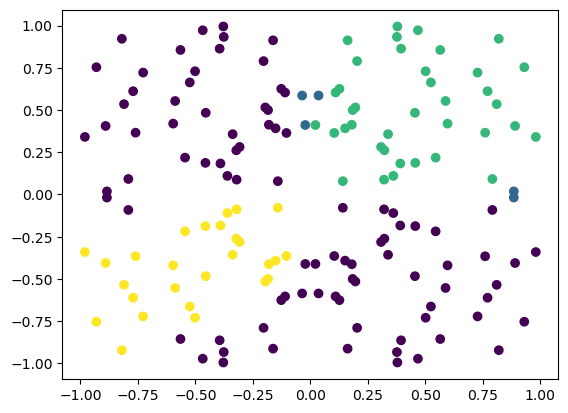

In [80]:
plt.scatter(*zip(*X), c=model_four_layer_4n.predict(X).argmax(axis=-1))

5/5 [==============================] - 0s 1ms/step


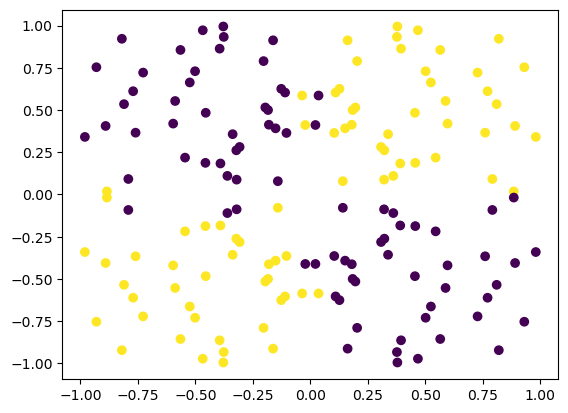

In [81]:
plt.scatter(*zip(*X), c=model_five_layer_4n.predict(X).argmax(axis=-1))

In [33]:
# The models for the four neuron setup show increased accuracy, with the four-neuron, three layer setup reaching an accuracy 
# of .912 (the best so far).

In [83]:
# Full Comparison of Neuron Values

# Comparison
(scores_two_layer, scores_three_layer, scores_four_layer, scores_five_layer,
scores_two_layer_3n, scores_three_layer_3n, scores_four_layer_3n, scores_five_layer_3n,
scores_two_layer_4n, scores_three_layer_4n, scores_four_layer_4n, scores_five_layer_4n)

([4.1732258796691895, 0.518750011920929],
 [3.8243298530578613, 0.5],
 [3.9812514781951904, 0.800000011920929],
 [4.0525898933410645, 0.5],
 [2.851390838623047, 0.16875000298023224],
 [4.156896114349365, 0.5],
 [0.0625719279050827, 0.4625000059604645],
 [0.0625719279050827, 0.4625000059604645],
 [0.6874362230300903, 0.28125],
 [5.800013542175293, 0.9125000238418579],
 [0.007748936302959919, 0.4937500059604645],
 [1.938126564025879, 0.4749999940395355])

In [84]:
# 3. Using the most optimal configuraion (n-layers, k-neurons per layer), compare how `tanh`, `sigmoid`,`softplus` and `relu` effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)
# Using four-neuron, three-layers setup
neurons = 4
## Four Hidden Layers
model_3l_4n_relu = Sequential()
model_3l_4n_relu.add(Dense(neurons, input_dim=2, activation='relu')) # Keeping Dense layers for consistency/simplicity 
model_3l_4n_relu.add(Dense(neurons, activation='relu')) # Add another layer; three total layers
model_3l_4n_relu.add(Dense(neurons, activation='relu')) 
# model_4l_4n_relu.add(Dense(neurons, activation='relu')) 

# tanh

## Four Hidden Layers
model_3l_4n_tanh = Sequential()
model_3l_4n_tanh.add(Dense(neurons, input_dim=2, activation='tanh')) # Keeping Dense layers for consistency/simplicity 
model_3l_4n_tanh.add(Dense(neurons, activation='tanh')) # Add another layer; three total layers
model_3l_4n_tanh.add(Dense(neurons, activation='tanh')) 
# model_4l_4n_tanh.add(Dense(neurons, activation='tanh')) 

# sigmoid

## Four Hidden Layers
model_3l_4n_sigmoid = Sequential()
model_3l_4n_sigmoid.add(Dense(neurons, input_dim=2, activation='sigmoid')) # Keeping Dense layers for consistency/simplicity 
model_3l_4n_sigmoid.add(Dense(neurons, activation='sigmoid')) # Add another layer; three total layers
model_3l_4n_sigmoid.add(Dense(neurons, activation='sigmoid')) 
# model_4l_4n_sigmoid.add(Dense(neurons, activation='sigmoid')) 

# softplus

## Four Hidden Layers
model_3l_4n_softplus = Sequential()
model_3l_4n_softplus.add(Dense(neurons, input_dim=2, activation='softplus')) # Keeping Dense layers for consistency/simplicity 
model_3l_4n_softplus.add(Dense(neurons, activation='softplus')) # Add another layer; three total layers
model_3l_4n_softplus.add(Dense(neurons, activation='softplus')) 
# model_4l_4n_softplus.add(Dense(neurons, activation='softplus')) 

# relu - Already used in above models

# Additional Activation Functions
# elu
model_3l_4n_elu = Sequential()
model_3l_4n_elu.add(Dense(neurons, input_dim=2, activation='softplus')) # Keeping Dense layers for consistency/simplicity 
model_3l_4n_elu.add(Dense(neurons, activation='softplus')) # Add another layer; three total layers
model_3l_4n_elu.add(Dense(neurons, activation='softplus')) 
# model_4l_4n_elu.add(Dense(neurons, activation='softplus')) 

#exponential
model_3l_4n_exp = Sequential()
model_3l_4n_exp.add(Dense(neurons, input_dim=2, activation='softplus')) # Keeping Dense layers for consistency/simplicity 
model_3l_4n_exp.add(Dense(neurons, activation='softplus')) # Add another layer; three total layers
model_3l_4n_exp.add(Dense(neurons, activation='softplus')) 
# model_4l_4n_elu.add(Dense(neurons, activation='softplus')) 


In [85]:
sgd = SGD(lr=0.1) # Keeping this in incase adjustments are needed
model_3l_4n_relu.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_3l_4n_tanh.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_3l_4n_sigmoid.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_3l_4n_softplus.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_3l_4n_elu.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_3l_4n_exp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [88]:
%%capture
# 400 Epoch Training
model_3l_4n_relu.fit(X, y, batch_size=12, epochs=400) 
model_3l_4n_tanh.fit(X, y, batch_size=12, epochs=400) 
# model_4l_4n_sigmoid.fit(X, y, batch_size=12, epochs=400) 
    # Sigmoid Training is throwing an error - trying with other activation models
model_3l_4n_softplus.fit(X, y, batch_size=12, epochs=400) 
model_3l_4n_elu.fit(X, y, batch_size=12, epochs=400) 
model_3l_4n_exp.fit(X, y, batch_size=12, epochs=400) 

In [89]:
# Accuracy Comparisons 
model_3l_4n_relu_scores = model_4l_4n_relu.evaluate(X, y)
model_3l_4n_tanh_scores = model_4l_4n_tanh.evaluate(X, y)
model_3l_4n_softplus_scores = model_4l_4n_softplus.evaluate(X, y)
model_3l_4n_elu_scores = model_4l_4n_elu.evaluate(X, y)
model_3l_4n_exp_scores = model_4l_4n_exp.evaluate(X, y)

# Comparison
(model_3l_4n_relu_scores, 
 model_3l_4n_tanh_scores, 
 model_3l_4n_softplus_scores, 
 model_3l_4n_elu_scores, 
 model_3l_4n_exp_scores)

5/5 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.3125


([7.7124738693237305, 0.5],
 [1.504901647567749, 0.2750000059604645],
 [1.9508568048477173, 0.5],
 [0.06959564983844757, 0.20624999701976776],
 [0.6844061613082886, 0.3125])

In [94]:
# Comparing Accuracy, relu and softplus are providing the best results, with .500 accuracy statistics 
# vs sub-.500 for the other models. Using relu for simplicity

In [95]:
model_3l_4n_relu_sgd = model_3l_4n_relu
model_3l_4n_relu_RMSprop = model_3l_4n_relu
model_3l_4n_relu_Adadelta = model_3l_4n_relu
model_3l_4n_relu_Nadam = model_3l_4n_relu
model_3l_4n_relu_Ftrl = model_3l_4n_relu

In [96]:
# 4. Again with the most optimal setup, try other optimizers (instead of `SGD`) and report on the loss score. (https://keras.io/optimizers/)

model_3l_4n_relu_sgd.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
model_3l_4n_relu_RMSprop.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
# model_4l_4n_relu_adamW = model_4l_4n_relu.compile(loss='binary_crossentropy', optimizer='AdamW', metrics=['accuracy'])
model_3l_4n_relu_Adadelta.compile(loss='binary_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
model_3l_4n_relu_Nadam.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])
model_3l_4n_relu_Ftrl.compile(loss='binary_crossentropy', optimizer='Ftrl', metrics=['accuracy'])

In [97]:
%%capture
# 400 Epoch Training
np.random.seed(2023)
model_3l_4n_relu_sgd.fit(X, y, batch_size=12, epochs=400) 
model_3l_4n_relu_RMSprop.fit(X, y, batch_size=12, epochs=400) 
model_3l_4n_relu_Adadelta.fit(X, y, batch_size=12, epochs=400) 
model_3l_4n_relu_Nadam.fit(X, y, batch_size=12, epochs=400) 
model_3l_4n_relu_Ftrl.fit(X, y, batch_size=12, epochs=400) 

In [98]:
# Accuracy Comparisons 
model_3l_4n_relu_sgd_scores = model_4l_4n_relu_sgd.evaluate(X, y)
model_3l_4n_relu_RMSprop_scores = model_4l_4n_relu_RMSprop.evaluate(X, y)
model_3l_4n_relu_Adadelta_scores = model_4l_4n_relu_Adadelta.evaluate(X, y)
model_3l_4n_relu_Nadam_scores = model_4l_4n_relu_Nadam.evaluate(X, y)
model_3l_4n_relu_Ftrl_scores = model_4l_4n_relu_Ftrl.evaluate(X, y)

5/5 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000 


In [45]:
# The differences in accuracy is relatively minimal between the various classifiers. 


## Part 2 - BYOD (Bring your own Dataset)
Using your own dataset, experiment and find the best Neural Network configuration. 
You may use any resource to improve results, just reference it.

While you may use any dataset, I'd prefer you didn't use the diabetes dataset used in the lesson.

https://stackoverflow.com/questions/34673164/how-to-train-and-tune-an-artificial-multilayer-perceptron-neural-network-using-k

https://keras.io/

In [99]:
# BYOD Info
# Source: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17
# Column meanings for reference:
    # alpha = Right Ascension angle (at J2000 epoch)
    # delta = Declination angle (at J2000 epoch)
    # u = Ultraviolet filter in the photometric system
    # g = Green filter in the photometric system
    # r = Red filter in the photometric system
    # i = Near Infrared filter in the photometric system
    # z = Infrared filter in the photometric system
    # redshift = redshift value based on the increase in wavelength


In [100]:
import pandas as pd
stars = pd.read_csv('../data/star_classification.csv')
stars.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [101]:
stars_classes = stars['class'].drop_duplicates()
stars_classes

0    GALAXY
5       QSO
9      STAR
Name: class, dtype: object

In [102]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(stars[['class']])

OneHotEncoder()

In [103]:
encoded_values = enc.transform(stars[['class']])
encoded_dataframe = pd.DataFrame(encoded_values.toarray())
encoded_dataframe.shape

(100000, 3)

In [105]:
encoded_dataframe[1].sum()
# There are just under 19k stars out of 100k rows 
is_star = encoded_dataframe[1]
is_star

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99995    0.0
99996    0.0
99997    0.0
99998    0.0
99999    0.0
Name: 1, Length: 100000, dtype: float64

In [106]:
stars_lean = stars[['alpha', 'delta','u','g','r','i','z', 'redshift']]
stars_lean

,alpha,delta,u,g,r,i,z,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123
...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040


In [107]:
stars_nn = pd.concat([stars_lean, encoded_dataframe[1]], axis=1)
stars_nn.rename(columns={1: 'is_star'}, inplace=True)
stars_nn

,alpha,delta,u,g,r,i,z,redshift,is_star
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,0.0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,0.0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,0.0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,0.0
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,0.0
...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,0.0
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,0.0
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,0.0
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,0.0


In [137]:
# Normalize Data
stars_lean_normal = (stars_lean-stars_lean.mean())/stars_lean.std()
stars_lean_normal

,alpha,delta,u,g,r,i,z,redshift
0,-0.434601,0.425527,0.059754,0.054926,0.403960,0.046007,0.003937,0.079557
1,-0.339920,0.363400,0.088045,0.072456,1.584398,1.185091,0.092834,0.277095
2,-0.367249,0.582710,0.103326,0.067165,0.519743,0.150018,0.008808,0.092422
3,1.669515,-1.249099,0.004921,0.102209,1.059899,0.807606,0.018321,0.486768
4,1.737301,-0.150241,-0.080055,-0.092947,-1.697412,-1.767878,-0.098468,-0.630263
...,...,...,...,...,...,...,...,...
99995,-1.430106,-1.360643,0.005890,0.076991,1.217558,1.263230,0.065143,-0.789182
99996,-1.535045,-0.220743,0.022371,0.058421,0.433624,0.382694,0.023526,-0.235068
99997,0.486603,-0.429358,-0.025538,-0.039729,-0.777180,-0.793287,-0.041496,-0.592981
99998,0.358950,1.146625,0.106075,0.034840,0.144546,-0.007005,-0.001386,-0.166443


In [138]:
## First NN 
stars_nn_two_layers_two_neurons = Sequential()
stars_nn_two_layers_two_neurons.add(Dense(2, input_dim=8, activation='relu')) # Keeping Dense layers for consistency/simplicity 
stars_nn_two_layers_two_neurons.add(Dense(2, activation='relu')) 

In [139]:
%%capture
sgd = SGD(lr=0.1)
stars_nn_two_layers_two_neurons.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Dataset is really big, so I am cutting the epochs down to a manageable size 
stars_nn_two_layers_two_neurons.fit(stars_lean_normal, is_star, batch_size=12, epochs=20, validation_split=0.2) 

In [140]:
# Accuracy
# Used a validation split (as per Stackoverflow thread) 
stars_nn_two_layers_two_neurons_scores = stars_nn_two_layers_two_neurons.evaluate(stars_lean, is_star)
(stars_nn_two_layers_two_neurons_scores)

3125/3125 [==============================] - 3s 1ms/step - loss: 2.7931 - accuracy: 0.6767


[2.793077230453491, 0.6767299771308899]

In [141]:
## Second NN - Adding Layers
stars_nn_three_layers_three_neurons = Sequential()
stars_nn_three_layers_three_neurons.add(Dense(3, input_dim=8, activation='relu')) # Keeping Dense layers for consistency/simplicity 
stars_nn_three_layers_three_neurons.add(Dense(3, activation='relu')) 
stars_nn_three_layers_three_neurons.add(Dense(3, activation='relu')) 

In [142]:
%%capture
sgd = SGD(lr=0.1)
stars_nn_three_layers_three_neurons.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Dataset is really big, so I am cutting the epochs down to a manageable size 
stars_nn_three_layers_three_neurons.fit(stars_lean_normal, is_star, batch_size=12, epochs=10, validation_split=0.2) 

In [143]:
# Accuracy
stars_nn_three_layers_three_neurons = stars_nn_two_layers_three_neurons.evaluate(stars_lean, is_star)
(stars_nn_three_layers_three_neurons)

3125/3125 [==============================] - 3s 879us/step - loss: 9.2134 - accuracy: 0.1906


[9.21337890625, 0.19062000513076782]

In [144]:
# This model performed worse; trying a model with mixed neurons next

In [145]:
%%capture
# Third NN - Mixing Neurons
stars_nn_three_layers_mixed_neurons = Sequential()
stars_nn_three_layers_mixed_neurons.add(Dense(3, input_dim=8, activation='relu')) # Keeping Dense layers for consistency/simplicity 
stars_nn_three_layers_mixed_neurons.add(Dense(2, activation='relu')) 
stars_nn_three_layers_mixed_neurons.add(Dense(3, activation='relu')) 
sgd = SGD(lr=0.1)
stars_nn_three_layers_mixed_neurons.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Dataset is really big, so I am cutting the epochs down to a manageable size 
stars_nn_three_layers_mixed_neurons.fit(stars_lean_normal, is_star, batch_size=12, epochs=10, validation_split=0.2) 

In [146]:
# Accuracy
stars_nn_three_layers_mixed_neurons_scores = stars_nn_three_layers_mixed_neurons.evaluate(stars_lean, is_star)
(stars_nn_three_layers_mixed_neurons)

3125/3125 [==============================] - 3s 978us/step - loss: 1.5917 - accuracy: 0.0000e+00


In [147]:
## The Mixed neuron model (3 layers, 1st and 3rd layer with 3 neurons and middle with 2) has an improved loss but similar accuracy

In [148]:
%%capture
# Fourth NN - Changing Configurations
stars_nn_mixed_neurons_softplus = Sequential()
stars_nn_mixed_neurons_softplus.add(Dense(3, input_dim=8, activation='softplus')) # Keeping Dense layers for consistency/simplicity 
stars_nn_mixed_neurons_softplus.add(Dense(2, activation='softplus')) 
stars_nn_mixed_neurons_softplus.add(Dense(3, activation='softplus')) 
sgd = SGD(lr=0.1)
stars_nn_mixed_neurons_softplus.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Dataset is really big, so I am cutting the epochs down to a manageable size 
stars_nn_mixed_neurons_softplus.fit(stars_lean_normal, is_star, batch_size=12, epochs=10, validation_split=0.2) 

In [149]:
# Accuracy
stars_nn_mixed_neurons_softplus_scores = stars_nn_mixed_neurons_softplus.evaluate(stars_lean, is_star)
(stars_nn_mixed_neurons_softplus_scores)

3125/3125 [==============================] - 3s 1ms/step - loss: 2.9248 - accuracy: 0.8104


[2.9248480796813965, 0.8103899955749512]

In [150]:
# The results of the softplus model were a improvement, with accuracy of .810

In [151]:
%%capture
# Fifth NN - Adding Layers
stars_nn_mixed_neurons_five_layers = Sequential()
stars_nn_mixed_neurons_five_layers.add(Dense(3, input_dim=8, activation='softplus')) # Keeping Dense layers for consistency/simplicity 
stars_nn_mixed_neurons_five_layers.add(Dense(2, activation='softplus')) 
stars_nn_mixed_neurons_five_layers.add(Dense(3, activation='softplus')) 
stars_nn_mixed_neurons_five_layers.add(Dense(2, activation='softplus')) 
stars_nn_mixed_neurons_five_layers.add(Dense(2, activation='softplus')) 
sgd = SGD(lr=0.1)
stars_nn_mixed_neurons_five_layers.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Dataset is really big, so I am cutting the epochs down to a manageable size 
stars_nn_mixed_neurons_five_layers.fit(stars_lean_normal, is_star, batch_size=12, epochs=10, validation_split=0.2) 

In [152]:
# Accuracy
stars_nn_mixed_neurons_five_layers_scores = stars_nn_mixed_neurons_five_layers.evaluate(stars_lean, is_star)
(stars_nn_mixed_neurons_five_layers_scores)

3125/3125 [==============================] - 4s 1ms/step - loss: 7.6413 - accuracy: 0.8104


[7.641303062438965, 0.8103799819946289]

In [ ]:
# Additional layers stayed in the same general area of accuracy, but with a greater loss function